In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score
)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/shruti/OneDrive/Desktop/ml lab/diabetes.csv", header=None, names=col_names)

In [88]:
print("First 5 rows:")
print(pima.head())

print("\nDataset Info:")
print(pima.info())

print("\nMissing values:")
print(pima.isnull().sum())

First 5 rows:
      pregnant  glucose             bp           skin  insulin   bmi  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

                   pedigree  age    label  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769

In [90]:
# feature_cols = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
# x = pima.drop('label',axis=1)
# y = pima['label']
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# 2. Convert relevant columns to numeric (assuming 'pima' is your DataFrame)
pima['glucose'] = pd.to_numeric(pima['glucose'], errors='coerce')
pima['label'] = pd.to_numeric(pima['label'], errors='coerce')
# 3. Drop missing values
pima = pima.dropna(subset=['glucose', 'label'])

In [92]:
X = pima[['glucose']]
y = pima['label']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)

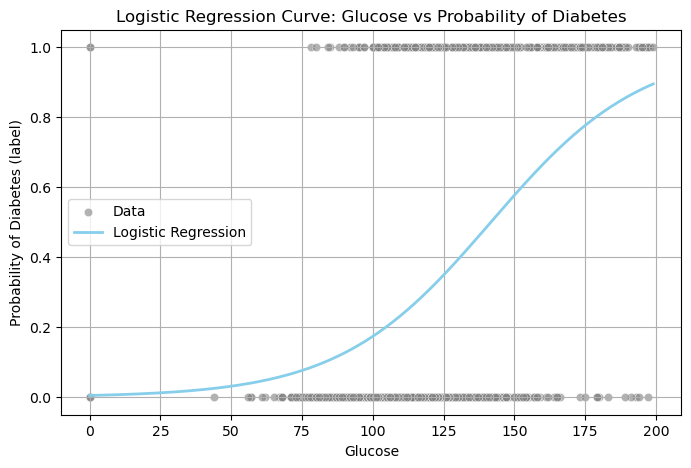

In [96]:
# 9. Plot scatterplot + logistic regression curve
# Generate a range of glucose values
glucose_range = np.linspace(pima['glucose'].min(), pima['glucose'].max(), 300).reshape(-1, 1)
glucose_range_df = pd.DataFrame(glucose_range, columns=['glucose'])
predicted_probs = model.predict_proba(glucose_range_df)[:, 1]


# Plot actual points
plt.figure(figsize=(8, 5))
sns.scatterplot(x='glucose', y='label', data=pima, color='grey', alpha=0.6, label='Data')

# Plot logistic regression line
plt.plot(glucose_range, predicted_probs, color='skyblue', linewidth=2, label='Logistic Regression')

# Styling
plt.title('Logistic Regression Curve: Glucose vs Probability of Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes (label)')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 13],
       [25, 30]], dtype=int64)

In [98]:
single_value = pd.DataFrame([[80]], columns=['glucose'])

# Predict
y_pred = model.predict(single_value)

print("Predicted label for glucose = 145:")
print(y_pred[0])

Predicted label for glucose = 145:
0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load dataset
df = pd.read_csv("C:/Users/shruti/OneDrive/Desktop/ml lab/diabetes.csv")

# Feature and target split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=16
)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [81]:
# Extract values
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

# Print results
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1 Score    : {f1_score:.4f}")
print(f"Specificity : {specificity:.4f}")


Accuracy    : 0.7662
Precision   : 0.7368
Recall      : 0.5185
F1 Score    : 0.6087
Specificity : 0.9000


In [62]:
from sklearn import metrics
import numpy as np

# Assuming y_test and y_pred are already defined
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
TP = cnf_matrix[1, 1]

# Calculate metrics
accuracy    = (TP + TN) / (TP + TN + FP + FN)
precision   = TP / (TP + FP) if (TP + FP) != 0 else 0
recall      = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score    = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

# Print results
print(f"Confusion Matrix:\n{cnf_matrix}")
print(f"\nAccuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1 Score    : {f1_score:.4f}")
print(f"Specificity : {specificity:.4f}")


Confusion Matrix:
[[90 10]
 [26 28]]

Accuracy    : 0.7662
Precision   : 0.7368
Recall      : 0.5185
F1 Score    : 0.6087
Specificity : 0.9000
